In [24]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [25]:
from sklearn.linear_model import LinearRegression

получаем таблицу значений

In [26]:
df = pd.read_csv('winequality-white.csv', sep=';', decimal='.', na_values='NaN')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [27]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

По сравнению с 6м и 5м качеством вин 3е и 9е очень редковстречаемые, поэтому вместо того, чтобы обучать по ним, сольем 3е и 4е вина в одно, а 9е приплюсуем к 8му. Они соседние по качеству, так что логику это нарушит не сильно.

In [28]:
df.shape

(4898, 12)

In [29]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [30]:
#  разделяю предикоторы и отклики
X = df.iloc[:, :-1] 
y = df.iloc[:, 11]  


In [31]:
for i in range(1, len(X)):
    if (y[i] == 9):
        y[i] = 8
    if (y[i] == 3):
        y[i] = 4


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
#  проверяю себя
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [33]:
#  проверяю себя
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [34]:
#  разделяю на обучающую и тестовую выборку

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)  


In [35]:
y_train.value_counts()

6    1484
5     971
7     571
4     132
8     123
Name: quality, dtype: int64

In [36]:
#  Стандартизация предикторов

from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  
scaler.fit(X_train)

#  Важно: одинаковые параметры стандартизации 
#  у обучающего и тестового множества!

X_train_2 = scaler.transform(X_train)  
X_test_2 = scaler.transform(X_test)  



In [37]:
#  Построение классификатора
#  По умолчанию Евклидово расстояние

from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors = 5, weights =  'distance')  
classifier.fit(X_train_2, y_train)  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [38]:
y_pred_train = classifier.predict(X_train_2)  
y_pred_test = classifier.predict(X_test_2)  


In [39]:
from sklearn.metrics import classification_report, confusion_matrix  


In [40]:
print(confusion_matrix(y_train, y_pred_train))  
print(classification_report(y_train, y_pred_train)) 
print(confusion_matrix(y_test, y_pred_test))  
print(classification_report(y_test, y_pred_test))  


[[ 132    0    0    0    0]
 [   0  971    0    0    0]
 [   0    0 1484    0    0]
 [   0    0    0  571    0]
 [   0    0    0    0  123]]
              precision    recall  f1-score   support

           4       1.00      1.00      1.00       132
           5       1.00      1.00      1.00       971
           6       1.00      1.00      1.00      1484
           7       1.00      1.00      1.00       571
           8       1.00      1.00      1.00       123

   micro avg       1.00      1.00      1.00      3281
   macro avg       1.00      1.00      1.00      3281
weighted avg       1.00      1.00      1.00      3281

[[ 11  23  14   2   1]
 [ 11 318 135  22   0]
 [  2 134 500  68  10]
 [  2  22 107 167  11]
 [  0   1  19  16  21]]
              precision    recall  f1-score   support

           4       0.42      0.22      0.29        51
           5       0.64      0.65      0.65       486
           6       0.65      0.70      0.67       714
           7       0.61      0.54    

Получаем следующую точность модели:

In [41]:
classifier.score(X_test_2, y_test)

0.6289424860853432

In [42]:
accuracy = []
for i in range(1, 50):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_2, y_train)
    pred_i = knn.predict(X_test_2)
    accuracy.append(1 - np.mean(pred_i != y_test))


In [43]:
print(np.round_(accuracy, 2))

[0.61 0.54 0.55 0.55 0.55 0.53 0.53 0.53 0.52 0.53 0.54 0.53 0.54 0.54
 0.54 0.54 0.54 0.53 0.53 0.53 0.54 0.53 0.54 0.53 0.54 0.55 0.54 0.55
 0.54 0.54 0.54 0.54 0.54 0.54 0.54 0.54 0.54 0.54 0.54 0.55 0.54 0.55
 0.54 0.54 0.55 0.54 0.55 0.55 0.55]


Text(0, 0.5, 'Mean Accuracy')

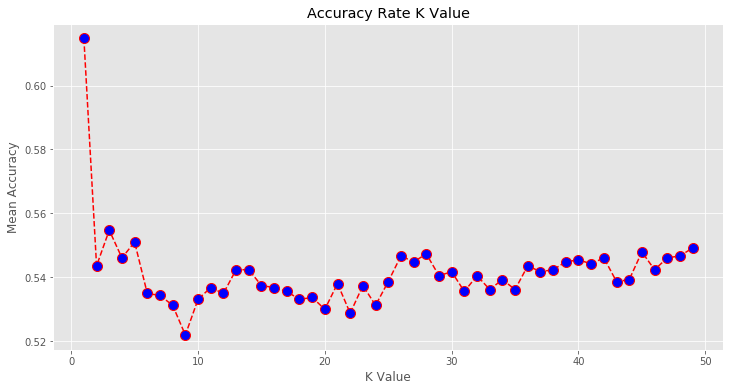

In [45]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), accuracy, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Accuracy')  


Я бы назвал оптимальным K = 2, после него точность меняется слабо